In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score
from google.colab import drive
drive.mount('/content/drive')


# 데이터 로드 및 전처리
def load_and_preprocess_data(file_path):
    df = pd.read_csv("/content/drive/MyDrive/MetacodeM/creditcard (1).csv", delimiter=',', dtype=np.float32)

    # 'Time'과 'Amount' 변수 전처리
    df['Time'] = df['Time'] % (24 * 3600)  # 일중 시간으로 변환
    df['Amount'] = np.log1p(df['Amount'])  # 로그 스케일링

    # NaN 값 처리 (제거 또는 대체)
    df.dropna(subset=['Class'], inplace=True)  # 'Class' 열의 NaN 값을 가진 행 제거

    features = df.drop(['Class'], axis=1)
    labels = df['Class']

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled, labels

# LSTM Autoencoder 모델 정의
def create_lstm_autoencoder(input_dim):
    inputs = Input(shape=(input_dim, 1))
    encoded = LSTM(64, activation='relu', return_sequences=False)(inputs)
    decoded = RepeatVector(input_dim)(encoded)
    decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
    decoded = Dense(1)(decoded)

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return autoencoder

# 모델 학습 및 이상 탐지
def train_and_detect(features, labels, threshold):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # 정상 데이터로만 학습
    X_train_normal = X_train[y_train == 0]

    # 모델 생성 및 학습
    model = create_lstm_autoencoder(X_train.shape[1])
    model.fit(X_train_normal.reshape(X_train_normal.shape[0], X_train_normal.shape[1], 1),
              X_train_normal.reshape(X_train_normal.shape[0], X_train_normal.shape[1], 1),
              epochs=50, batch_size=32, validation_split=0.1, verbose=1)

    # 이상 탐지
    X_test_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = np.mean(np.power(X_test - X_test_pred.reshape(X_test_pred.shape[0], X_test_pred.shape[1]), 2), axis=1)

    y_pred = (mse > threshold).astype(int)

    return y_pred, y_test

# 성능 평가
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Confusion Matrix:\n", cm)
    print("F1 Score:", f1)

# 메인 실행 코드
if __name__ == "__main__":
    file_path = "/content/credit_card_transactions.csv"
    features, labels = load_and_preprocess_data(file_path)

    threshold = 0.1  # 이 값은 실험을 통해 최적화해야 합니다
    y_pred, y_test = train_and_detect(features, labels, threshold)

    evaluate_model(y_test, y_pred)


Mounted at /content/drive
Epoch 1/50
6398/6398 [==============================] - 268s 41ms/step - loss: 15990.6211 - val_loss: 1.9252
Epoch 2/50
6398/6398 [==============================] - 236s 37ms/step - loss: 175.4097 - val_loss: 0.9271
Epoch 3/50
6398/6398 [==============================] - 226s 35ms/step - loss: 0.9580 - val_loss: 0.8972
Epoch 4/50
6398/6398 [==============================] - 224s 35ms/step - loss: 0.9634 - val_loss: 0.9086
Epoch 5/50
6398/6398 [==============================] - 232s 36ms/step - loss: 0.9027 - val_loss: 0.9269
Epoch 6/50
6398/6398 [==============================] - 227s 36ms/step - loss: 2.6056 - val_loss: 0.9527
Epoch 7/50
6398/6398 [==============================] - 226s 35ms/step - loss: 0.9321 - val_loss: 0.8925
Epoch 8/50
6398/6398 [==============================] - 225s 35ms/step - loss: 1193.4442 - val_loss: 1.1454
Epoch 9/50
6398/6398 [==============================] - 229s 36ms/step - loss: 1.8312 - val_loss: 0.9206
Epoch 10/50
6398/639

In [3]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123576 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo


기술통계:
               Time            V1            V2            V3            V4  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.554698e-17  1.546790e-17 -1.277349e-17 -7.185087e-17 -2.115609e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.486373e+00 -2.879855e+01 -4.403529e+01 -3.187173e+01 -4.013919e+00   
25%   -6.738023e-01 -4.698917e-01 -3.624707e-01 -5.872141e-01 -5.993788e-01   
50%    8.087540e-02  9.245351e-03  3.965684e-02  1.186124e-01 -1.401724e-02   
75%    8.195194e-01  6.716939e-01  4.867202e-01  6.774569e-01  5.250082e-01   
max    1.618165e+00  1.253352e+00  1.335775e+01  6.187993e+00  1.191874e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -2.554698e-17 -1.500125e-09 -1.071518e-09 -1.607277e-10 -3.214554e-10   
std    1.000002e+00  1.332271e+00  1.237094e

<ipython-input-4-ca3c38c212a4>:44: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
<ipython-input-4-ca3c38c212a4>:45: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('feature_distributions.png')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


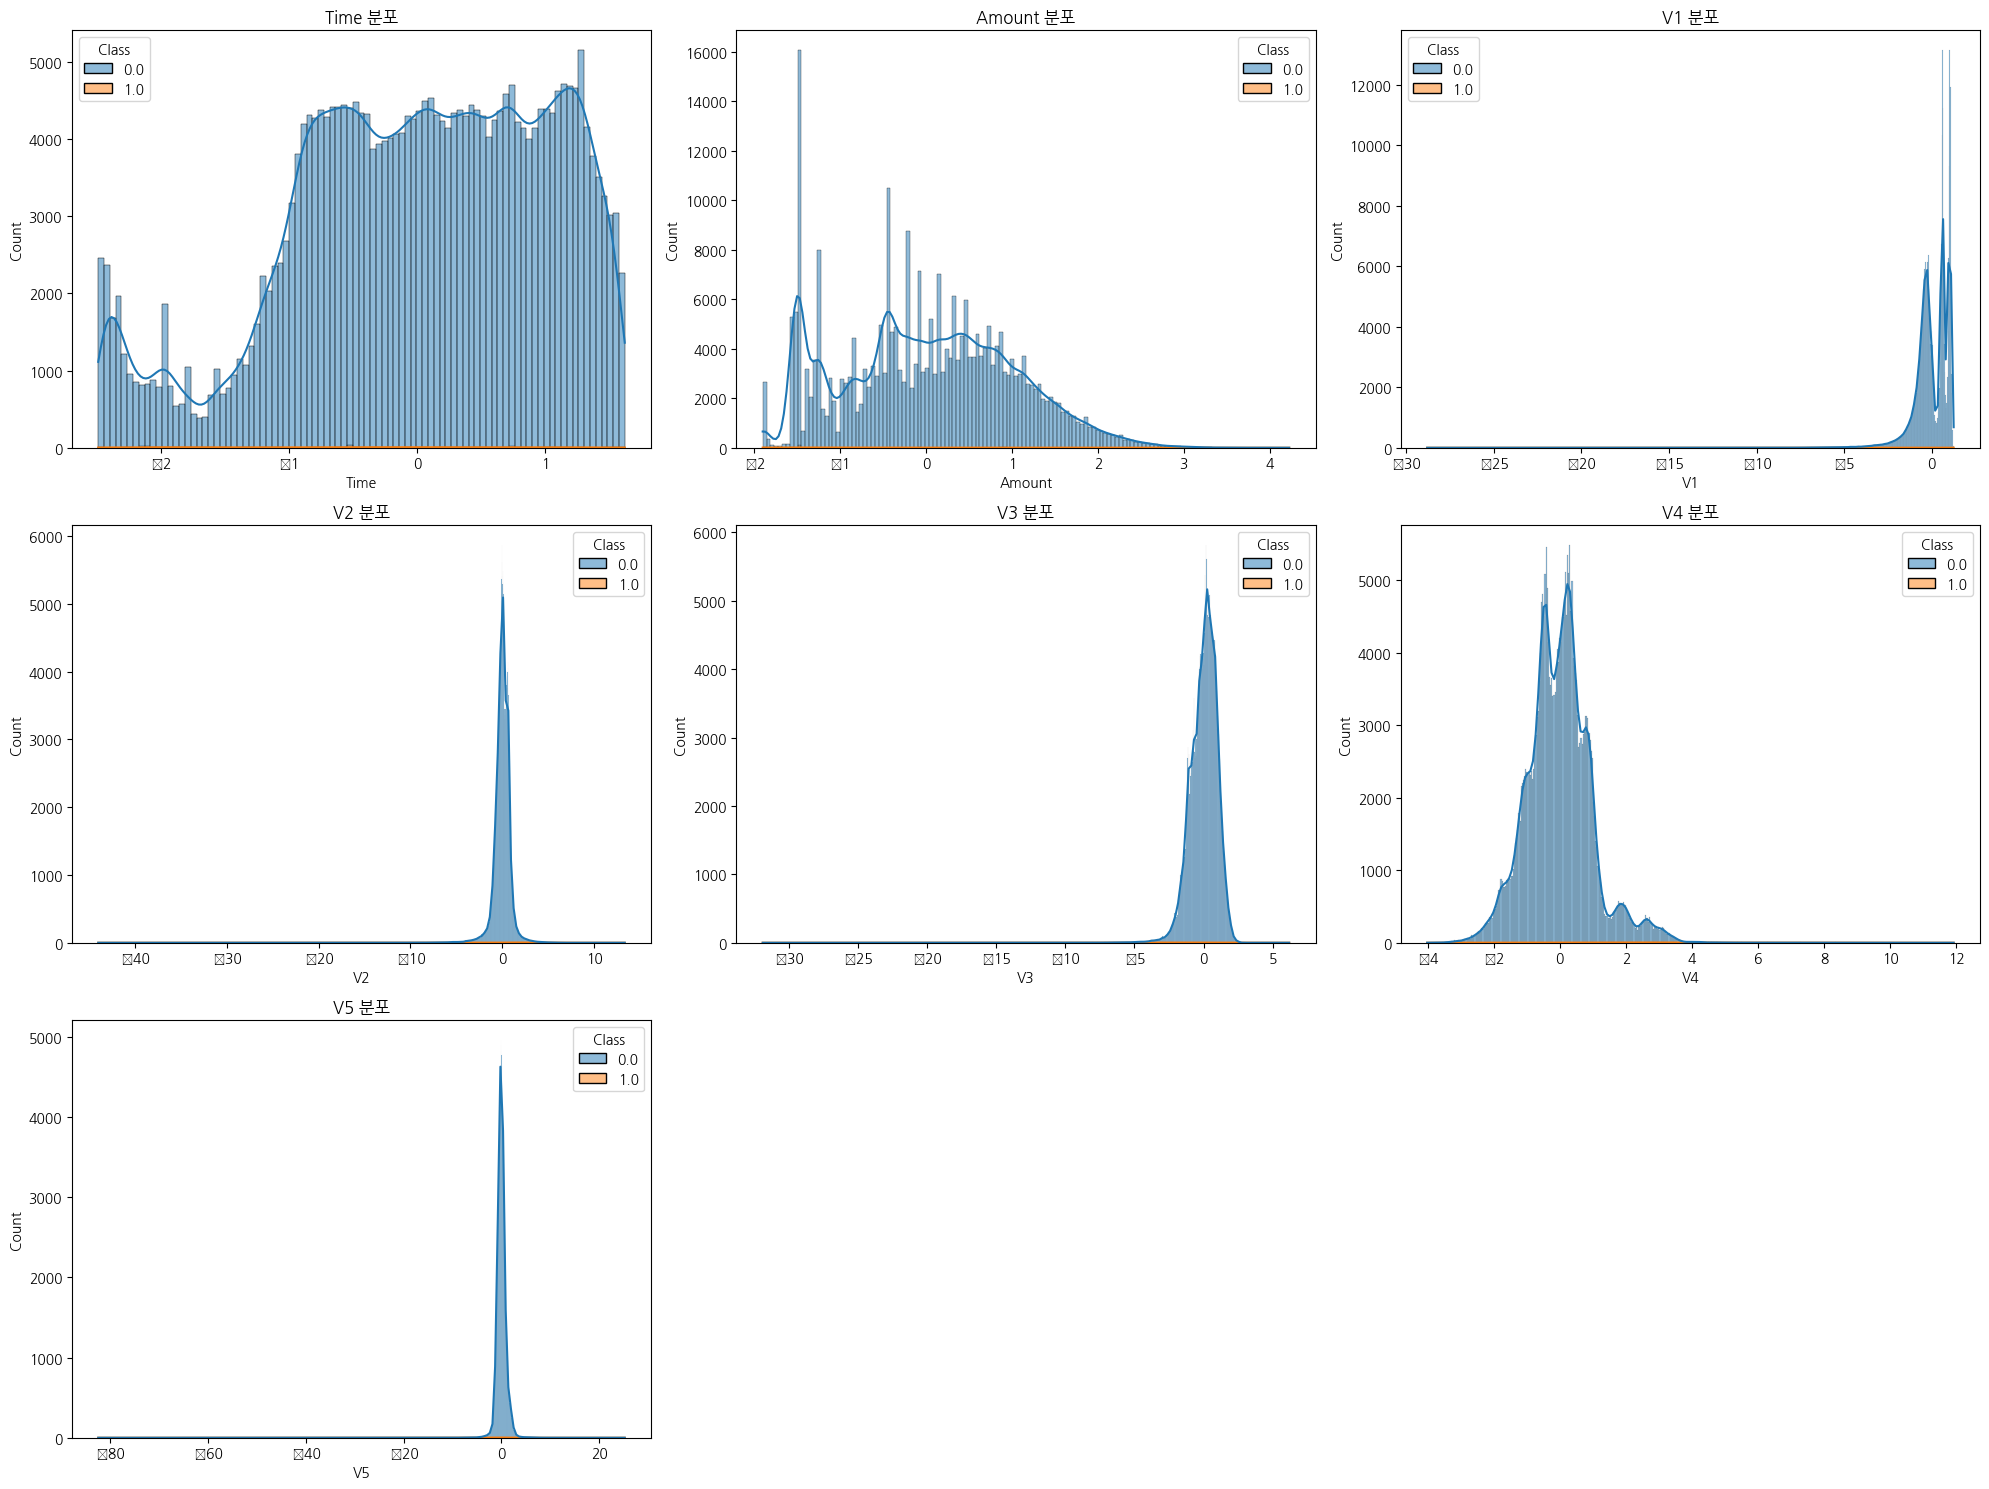

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
<ipython-input-4-ca3c38c212a4>:52: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('correlation_heatmap.png')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


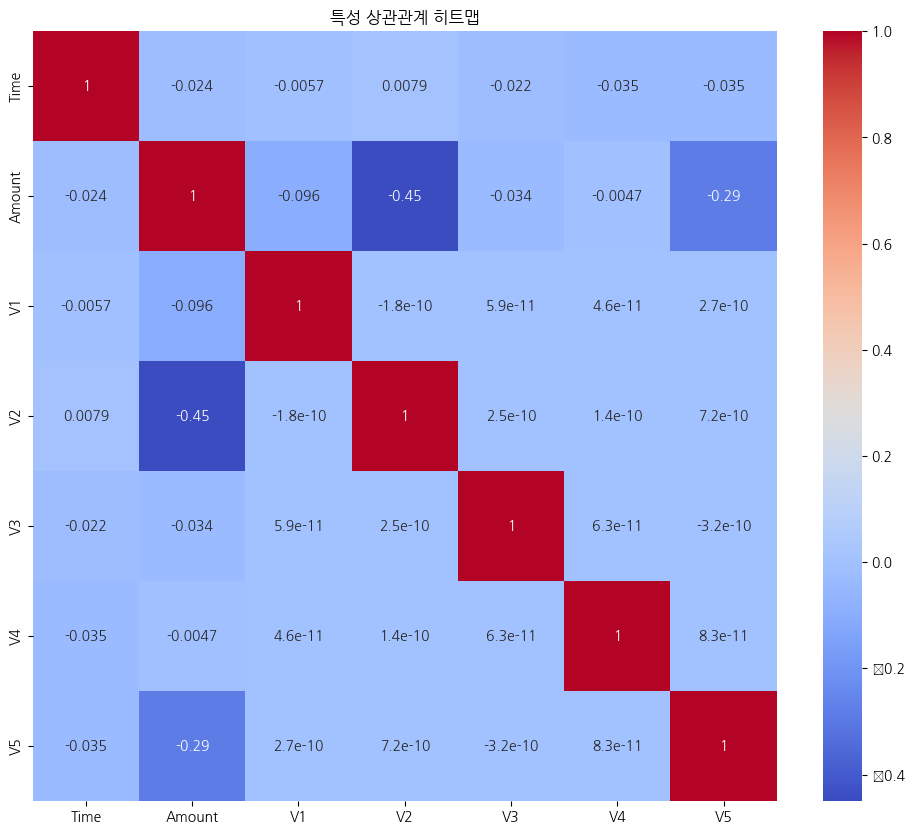

<ipython-input-4-ca3c38c212a4>:59: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('amount_distribution.png')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


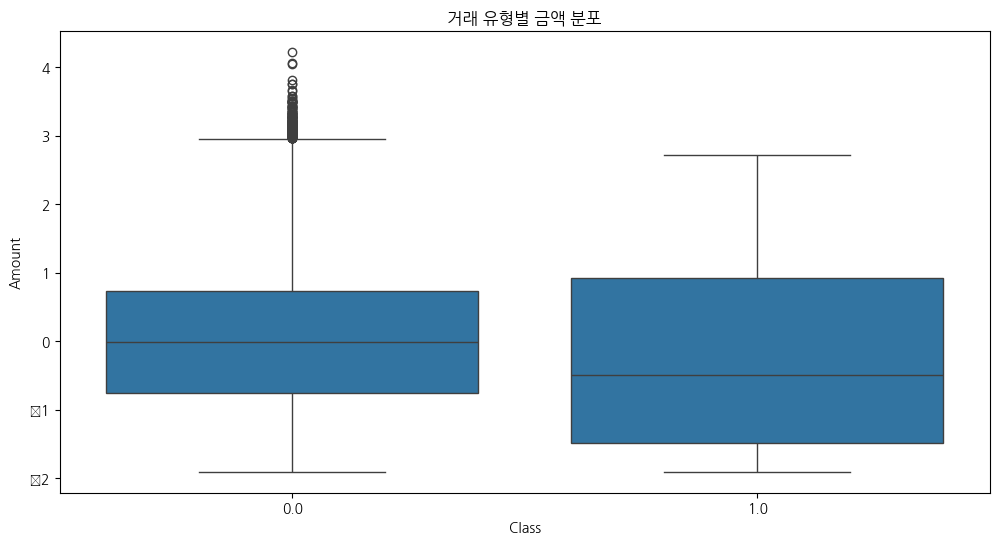

<ipython-input-4-ca3c38c212a4>:67: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('hourly_distribution.png')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


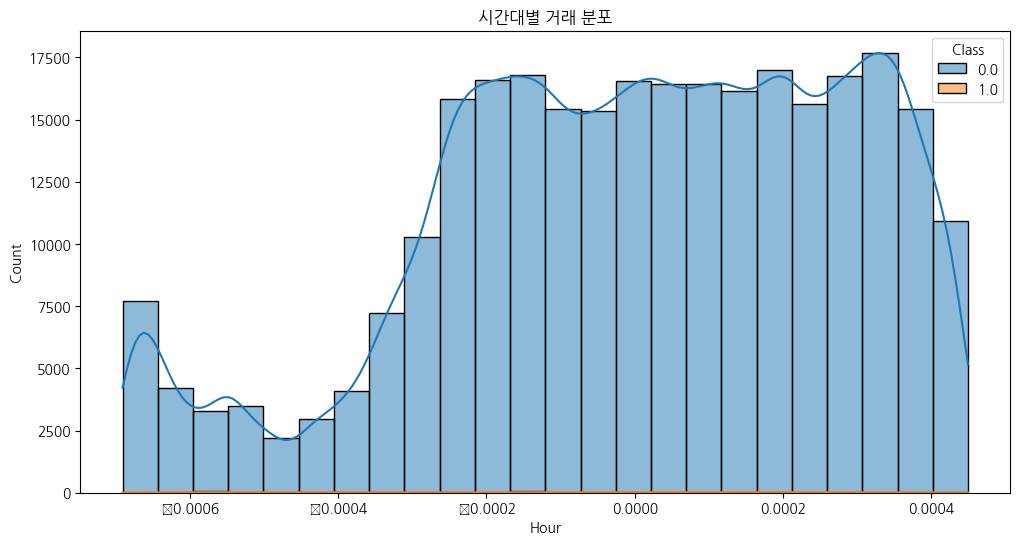

데이터셋 생성 및 분석 완료. 시각화 결과는 PNG 파일로 저장되었습니다.


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 시드 설정
np.random.seed(42)

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/MetacodeM/creditcard (1).csv", delimiter=',', dtype=np.float32)

# 데이터 전처리
df['Time'] = df['Time'] % (24 * 3600)  # 일중 시간으로 변환
df['Amount'] = np.log1p(df['Amount'])  # 로그 스케일링

# 특성 정규화
scaler = StandardScaler()
features = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5']
df[features] = scaler.fit_transform(df[features])

# 기술통계 분석 함수
def print_statistics(df):
    print("\n기술통계:")
    print(df.describe())

    print("\n각 특성의 왜도:")
    print(df[features].skew())

    print("\n각 특성의 첨도:")
    print(df[features].kurtosis())

    print("\n이상치 비율:")
    print(f"{df['Class'].mean()*100:.2f}%")

# 시각화 함수
def visualize_data(df):
    # 히스토그램
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i+1)
        sns.histplot(data=df, x=feature, hue='Class', kde=True)
        plt.title(f'{feature} 분포')
    plt.tight_layout()
    plt.savefig('feature_distributions.png')
    plt.show()

    # 상관관계 히트맵
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
    plt.title('특성 상관관계 히트맵')
    plt.savefig('correlation_heatmap.png')
    plt.show()

    # 이상치와 정상치의 금액 분포 비교
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Class', y='Amount', data=df)
    plt.title('거래 유형별 금액 분포')
    plt.savefig('amount_distribution.png')
    plt.show()

    # 시간대별 거래 분포
    df['Hour'] = df['Time'] / 3600
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='Hour', hue='Class', kde=True, bins=24)
    plt.title('시간대별 거래 분포')
    plt.savefig('hourly_distribution.png')
    plt.show()

# 기술통계 출력
print_statistics(df)

# 데이터 시각화
visualize_data(df)

# 데이터셋 저장
df.to_csv('credit_card_transactions.csv', index=False)

print("데이터셋 생성 및 분석 완료. 시각화 결과는 PNG 파일로 저장되었습니다.")
